# Libraries

In [1]:
from google.colab import drive
import os as os
from requests import get

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import losses
from keras.wrappers.scikit_learn import KerasClassifier
from keras.wrappers.scikit_learn import KerasRegressor

# Data

In [2]:
drive.mount('/content/gdrive', force_remount=True)
dir = os.path.join('gdrive', 'My Drive', 'Eurostat', '03 - Data Science for Unstructured Data')
data_dir = os.path.join(dir, 'data')

Mounted at /content/gdrive


In [3]:
!cd "gdrive${dir}" && mkdir -p data

In [4]:
def download_save(url, filename):
  res = get(url)
  if res.status_code != 200:
    print(f"Couldn't fetch data from {url}")
  else:
    csv_file = open(os.path.join(data_dir, filename), 'wb')
    csv_file.write(res.content)
    csv_file.close()

## Wine

In [5]:
%%html
<iframe src="https://archive.ics.uci.edu/ml/datasets/wine+quality" width="1100" height="600"></iframe>

In [6]:
download_save('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',
              'wine.csv')

In [7]:
df_wine = pd.read_csv(os.path.join(data_dir, 'wine.csv'), sep=';')
print(df_wine.shape)
df_wine.sample(10)

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1054,8.2,0.640,0.27,2.0,0.095,5.0,77.0,0.99747,3.13,0.62,9.1,6
273,8.4,0.715,0.20,2.4,0.076,10.0,38.0,0.99735,3.31,0.64,9.4,5
910,9.3,0.380,0.48,3.8,0.132,3.0,11.0,0.99577,3.23,0.57,13.2,6
946,10.2,0.440,0.58,4.1,0.092,11.0,24.0,0.99745,3.29,0.99,12.0,7
547,10.6,0.310,0.49,2.5,0.067,6.0,21.0,0.99870,3.26,0.86,10.7,6
95,4.7,0.600,0.17,2.3,0.058,17.0,106.0,0.99320,3.85,0.60,12.9,6
124,7.8,0.500,0.17,1.6,0.082,21.0,102.0,0.99600,3.39,0.48,9.5,5
1296,6.6,0.630,0.00,4.3,0.093,51.0,77.5,0.99558,3.20,0.45,9.5,5
1318,7.5,0.630,0.27,2.0,0.083,17.0,91.0,0.99616,3.26,0.58,9.8,6
231,8.0,0.380,0.06,1.8,0.078,12.0,49.0,0.99625,3.37,0.52,9.9,6


## Diabetes
https://www.kaggle.com/uciml/pima-indians-diabetes-database

In [8]:
download_save('https://gist.githubusercontent.com/ktisha/c21e73a1bd1700294ef790c56c8aec1f/raw/819b69b5736821ccee93d05b51de0510bea00294/pima-indians-diabetes.csv',
              'pima.csv')

In [9]:
df_pima = pd.read_csv(os.path.join(data_dir, 'pima.csv'),
                      header=8,
                      names = ['preg', 'gluc', 'pres', 'skin' ,'insu', 'bmi', 'pedi', 'age', 'class'])
df_pima.sample(10)

,preg,gluc,pres,skin,insu,bmi,pedi,age,class
388,5,144,82,26,285,32.0,0.452,58,1
184,4,141,74,0,0,27.6,0.244,40,0
453,2,119,0,0,0,19.6,0.832,72,0
286,5,155,84,44,545,38.7,0.619,34,0
477,7,114,76,17,110,23.8,0.466,31,0
463,5,88,78,30,0,27.6,0.258,37,0
464,10,115,98,0,0,24.0,1.022,34,0
15,7,100,0,0,0,30.0,0.484,32,1
566,1,99,72,30,18,38.6,0.412,21,0
36,11,138,76,0,0,33.2,0.420,35,0


# Regression

In [10]:
X = df_wine.copy()
y = X.pop('quality')
scaler = MinMaxScaler((-1, 1))

## Standardization

In [11]:
X = df_wine.copy()
y = X.pop('quality')

scaler = MinMaxScaler((-1, 1))

X = pd.DataFrame(scaler.fit_transform(X),
                       columns=X.columns,
                       index=X.index)

In [12]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.504425,-0.205479,-1.00,-0.863014,-0.786311,-0.718310,-0.802120,0.135095,0.212598,-0.724551,-0.692308
1,-0.433628,0.041096,-1.00,-0.767123,-0.712855,-0.323944,-0.568905,-0.011747,-0.275591,-0.580838,-0.569231
2,-0.433628,-0.123288,-0.92,-0.808219,-0.732888,-0.605634,-0.660777,0.017621,-0.181102,-0.616766,-0.569231
3,0.168142,-0.780822,0.12,-0.863014,-0.789649,-0.549296,-0.618375,0.164464,-0.338583,-0.700599,-0.569231
4,-0.504425,-0.205479,-1.00,-0.863014,-0.786311,-0.718310,-0.802120,0.135095,0.212598,-0.724551,-0.692308


## Linear Regression

In [13]:
model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
predictions = model.predict(X)
mse = mean_squared_error(y, predictions)
print(mse)

0.41676716722140794


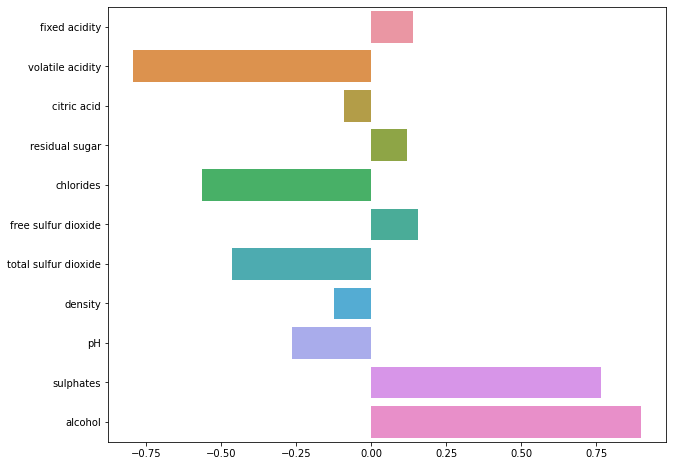

In [15]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(y=X.columns, x=model.coef_, orient='h')
plt.show()

## Perceptron

### Build

In [16]:
input_shape = X.shape[1]

model = keras.Sequential([
    layers.Dense(units=1,
                 input_shape=[input_shape],
                 activation=None)
])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 12        
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________


### Compile

In [18]:
model.compile(loss=losses.MeanSquaredError())

### Train

In [19]:
%%time
history = model.fit(X,
                    y,
                    epochs=1000,
                    verbose=0)

CPU times: user 46.8 s, sys: 4.08 s, total: 50.9 s
Wall time: 37.3 s


### Predict

In [20]:
predictions = model.predict(X)
mse = mean_squared_error(y, predictions)
print(mse)

0.4182148647183711


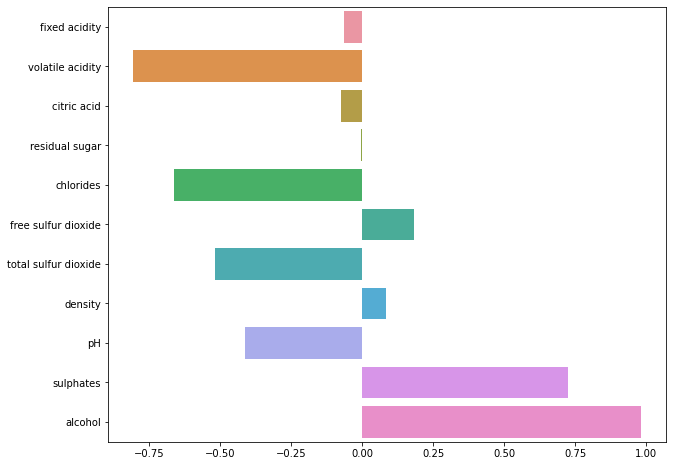

In [21]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(y=X.columns,
            x=model.weights[0].numpy().flatten(),
            orient='h')
plt.show()

# Pipelines


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

## Linear Regression

In [23]:
model = Pipeline([('scaler', MinMaxScaler((-1, 1))),
                  ('regressor', LinearRegression())])

model.fit(X_train, y_train)

predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(mse)

0.42553503336710863


## Perceptron

In [24]:
def create_perceptron(input_shape):
  model = keras.Sequential([
    layers.Dense(units=1,
                 input_shape=[input_shape],
                 activation=None)
  ])

  model.compile(loss=losses.MeanSquaredError())

  return model

In [25]:
perceptron = KerasRegressor(build_fn=create_perceptron,
                            input_shape=X_train.shape[1],
                            epochs=1000,
                            verbose=0)

model = Pipeline([('scaler', MinMaxScaler((-1, 1))),
                  ('regressor', perceptron)])

model.fit(X_train, y_train)

predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(mse)

0.42036956797307


# Classification

In [26]:
df_pima.sample(5)

,preg,gluc,pres,skin,insu,bmi,pedi,age,class
239,0,104,76,0,0,18.4,0.582,27,0
448,0,104,64,37,64,33.6,0.510,22,1
182,1,0,74,20,23,27.7,0.299,21,0
367,0,101,64,17,0,21.0,0.252,21,0
122,2,107,74,30,100,33.6,0.404,23,0


In [27]:
X = df_pima.copy()
y = X.pop('class')

## Logistic Regression

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

model = Pipeline([('scaler', MinMaxScaler((-1, 1))),
                  ('classifier',  LogisticRegression(max_iter=1000))])

model.fit(X_train, y_train)

predictions = model.predict(X)
acc = accuracy_score(y, predictions)
print(acc)

0.77734375


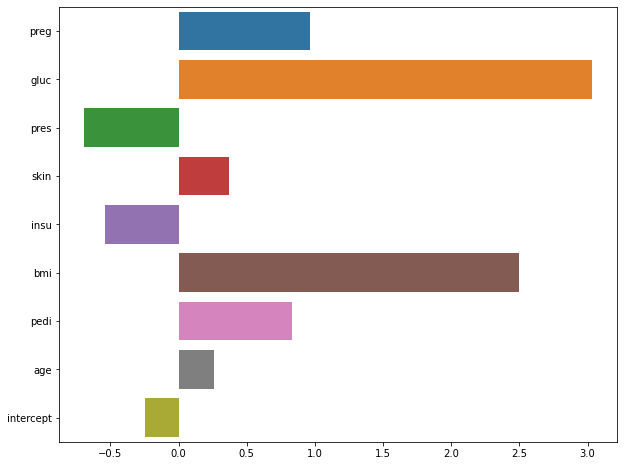

In [29]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(y=[*X.columns,
               'intercept'],
            x=[*model.named_steps['classifier'].coef_[0],
               model.named_steps['classifier'].intercept_[0]],
            orient='h')
plt.show()

## Perceptron

In [30]:
def create_perceptron(input_shape):
  model = keras.Sequential([
    layers.Dense(units=1,
                 input_shape=[input_shape],
                 activation='sigmoid')
  ])

  model.compile(loss=losses.MeanSquaredError())

  return model

In [31]:
perceptron = KerasClassifier(build_fn=create_perceptron,
                             input_shape=X_train.shape[1],
                             epochs=1000,
                             verbose=0)

model = Pipeline([('scaler', MinMaxScaler((-1, 1))),
                  ('classifier', perceptron)])

model.fit(X_train, y_train)

predictions = model.predict(X)
acc = accuracy_score(y, predictions)
print(acc)

0.7760416666666666


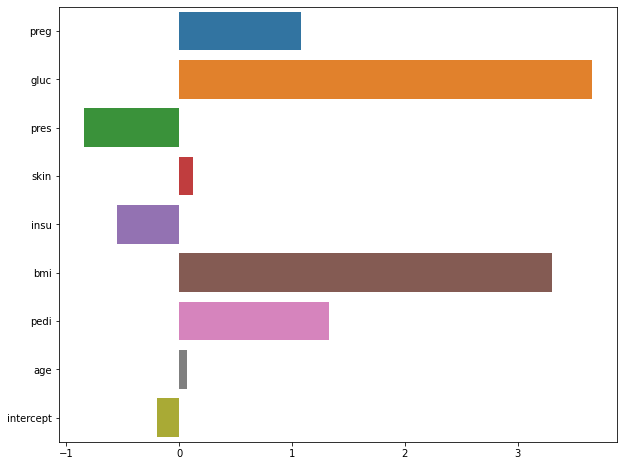

In [32]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(y=[*X.columns,
               'intercept'],
            x=[*model.named_steps['classifier'].model.weights[0].numpy().flatten(), 
               *model.named_steps['classifier'].model.weights[1].numpy().flatten()],
            orient='h')
plt.show()

# ❓ Exercise

Create the follwoing multilayer perceptron (MLP) regressor.

How many weights does it have?

_Hint_: Use model.summary()

In [33]:
%%html
<img src="https://www.researchgate.net/profile/Martin-Cenek/publication/325067027/figure/fig5/AS:669059146342414@1536527539867/Illustration-of-the-multilayer-perceptron-artificial-neural-network-implementation-for.png"/>